In [1]:
#Importing libraries

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Pandas and NumPy
import pandas as pd, numpy as np
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# visulaisation
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

%matplotlib inline

In [2]:
# Loading dataset
gdata = pd.read_csv('Leads.csv', encoding=' ISO-8859-1')
gdata.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,...,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [3]:
# Shape of the dataset

gdata.shape

(9240, 37)

The given dataset has 9240 rows and 37 columns

In [4]:
# Inspect the different column in the dataset

gdata.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Check the info to see the types of the feature variables and the null values present

gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are a lot of null values present that needs to be treated.


Categorical variables are present in this dataset-- Create dummy variables.

In [6]:
# Check the summary of the dataset

gdata.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,5fb009df-1fee-4177-a011-390824a96d9e,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
#Looking at the datatypes of variables

gdata.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

## Data Cleaning and Preparation

In [8]:
# Dropping redundant columns like 'Prospect ID','Lead Number','Country',
# 'I agree to pay the amount through cheque' and 'a free copy of Mastering The Interview'

red_cols=['Prospect ID','Lead Number','I agree to pay the amount through cheque',
          'A free copy of Mastering The Interview']

gdata=gdata.drop(red_cols,1)

Now, there are some columns/categorical variables having label as 'Select' which means the customer was not selected any option hence it is better to put it as null value - Because there was no suitable option present to select for the customer searching for.

In [9]:
# Converting 'Select' values to NaN.
gdata = gdata.replace('Select', np.nan)

In [10]:
# Check the number of missing values in each column

gdata.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [11]:
# Checking the percentage of missing values
round(100*(gdata.isnull().sum()/len(gdata.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

As you can see there are a lot of column which have high percentage of missing values. Clearly, these columns are not useful. Since,let's eliminate the columns having greater than 45% missing values as they are of no use to us.

In [12]:
# Drop all the columns in which greater than 45% missing values are present
gdata = gdata.drop(gdata.loc[:,list(round(100*(gdata.isnull().sum()/len(gdata.index)), 2)>45)].columns, 1)

In [13]:
# Checking the percentage of missing values again
round(100*(gdata.isnull().sum()/len(gdata.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

lets address other missing values:

In [14]:
#Looking at City column
gdata['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

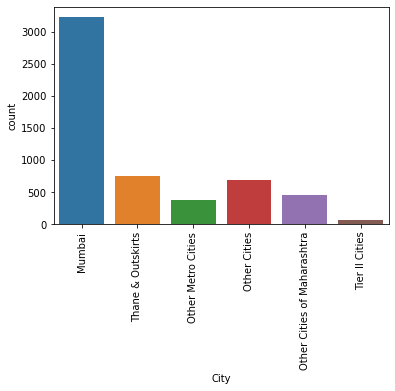

In [15]:
#Ploting City counts
sns.countplot(gdata.City)
xticks(rotation = 90)

high number of the data is Mumbai so it is a biased data, so we will drop it

In [16]:
#Droping City Column
gdata.drop(['City'], axis = 1, inplace = True)

In [17]:
#Looking at Country Column
gdata['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Philippines                2
Ghana                      2
Bangladesh                 2
China                      2
Italy                      2
Belgium                    2
Denmark                    1
Kenya                      1
Russia                     1
Sri Lanka                  1
Vietnam                    1
Indonesia                  1
Liberia       

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

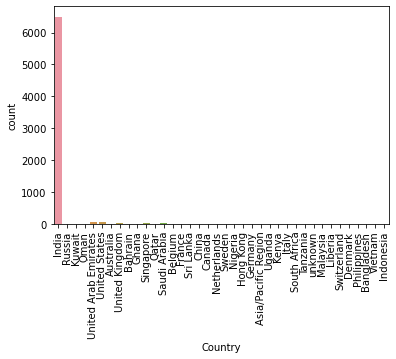

In [18]:
#Ploting Count of Country Column
sns.countplot(gdata.Country)
xticks(rotation = 90)

high number of the data is India this means it is a biased data, so we will drop it

In [19]:
#Droping Country Column
gdata.drop(['Country'], axis = 1, inplace = True)

In [20]:
#Looking at 'What matters most to you in choosing a course' Column
gdata['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

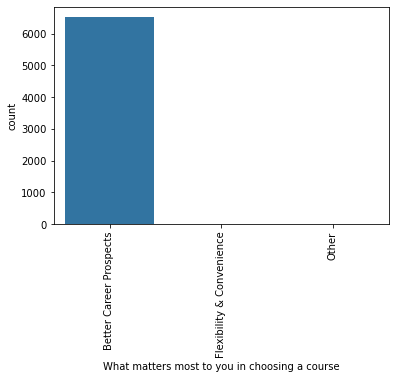

In [21]:
#Looking at the plot
sns.countplot(gdata['What matters most to you in choosing a course'])
xticks(rotation = 90)

again the data is biased, so we will drop it

In [22]:
#Droping 'What matters most to you in choosing a course'
gdata.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [23]:
#Looking at 'Specialization' column
gdata['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

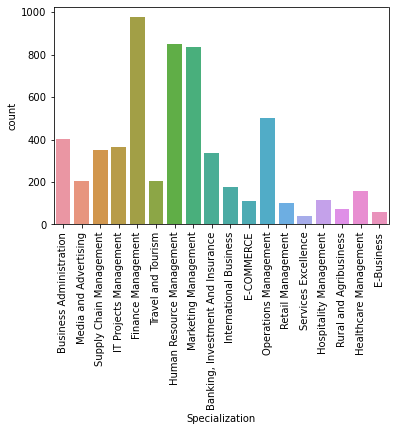

In [24]:
sns.countplot(gdata.Specialization)
xticks(rotation = 90)

It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
may not have any specialization or is a student.
Hence we can make a category "Others" for missing values. 

In [25]:
#Replacing NaN with Others in 'Specialization' Column
gdata['Specialization'] = gdata['Specialization'].replace(np.nan, 'Others')

In [26]:
# Checking the percentage of missing values again
round(100*(gdata.isnull().sum()/len(gdata.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                             0.00
What is your current occupation           29.11
Search                                     0.00
Magazine                                   0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Receive More Updates About Our Courses     0.00
Tags                                      36.29
Update me on Supply Chain Content       

In [27]:
# TotalVisits column

gdata['TotalVisits'].value_counts().head(5)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64


0.0 is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [28]:
#'Lead Source' column
gdata['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
blog                    1
Pay per Click Ads       1
NC_EDM                  1
youtubechannel          1
WeLearn                 1
testone                 1
welearnblog_Home        1
Name: Lead Source, dtype: int64

Google is having highest number of occurences, hence we will impute the missing values with label 'Google'


In [29]:
#'Page Views Per Visit' column
gdata['Page Views Per Visit'].value_counts().head(5)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

0.0 is having highest number of occurences, hence we will impute the missing values with label '0.0'

In [30]:
#'Last Activity' column
gdata['Last Activity'].value_counts().head(5)


Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64


Email Opened is having highest number of occurences, hence we will impute the missing values with label 'Email Opened'

In [31]:
#'Tags' columns
gdata['Tags'].value_counts().head(5)

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

Will revert after reading the email is the mode, so we will replace it with missing values

In [32]:
#'What is your current occupation' column
gdata['What is your current occupation'].value_counts().head(5)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

Unemployed is having highest number of occurences, hence we will impute the missing values with label 'Unemployed'

In [33]:
# Now, imputing these values in our missing values dataset for respective categories

missing_values={'Lead Source':'Google','TotalVisits':0,'Page Views Per Visit':0,'Last Activity':'Email Opened','What is your current occupation':'Unemployed',
               'Tags':'Will revert after reading the email','What is your current occupation':'Unemployed'}
            
gdata=gdata.fillna(value=missing_values)

In [34]:
# Checking the percentage of missing values again
round(100*(gdata.isnull().sum()/len(gdata.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Magazine                                  0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Receive More Updates About Our Courses    0.0
Tags                                      0.0
Update me on Supply Chain Content         0.0
Get updates on DM Content         

'Lead Source' is having same label name 'Google' but in different format('google') so we need to make them in a same format hence using below commands

In [35]:
# Applying lambda to captilize the first character of the column 'Lead Source'

gdata['Lead Source']=gdata['Lead Source'].apply(lambda x:x.capitalize())

gdata['Lead Source'].value_counts()



Google               2909
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Press_release           2
Social media            2
Pay per click ads       1
Blog                    1
Nc_edm                  1
Welearn                 1
Youtubechannel          1
Welearnblog_home        1
Testone                 1
Name: Lead Source, dtype: int64

In [36]:
#less percentage variables are binned together as Others
gdata['Lead Source'] = gdata['Lead Source'].replace(['Click2call', 'Live chat', 'Nc_edm', 'Pay per click ads', 'Press_release',
  'Social media', 'Welearn', 'Bing', 'Blog', 'Testone', 'Welearnblog_home', 'Youtubechannel'], 'Others')

In [37]:
gdata['Lead Source'].value_counts()

Google              2909
Direct traffic      2543
Olark chat          1755
Organic search      1154
Reference            534
Welingak website     142
Referral sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

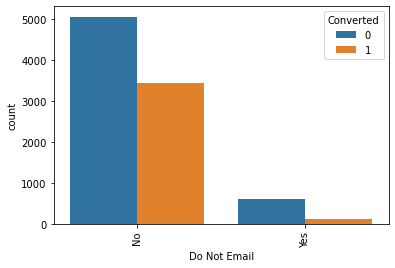

In [38]:
#ploting Do Not Email column to see how many got Converted
sns.countplot(x = "Do Not Email", hue = "Converted", data = gdata)
xticks(rotation = 90)


There is a very small amount of conversion that has happened when this value is Yes

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

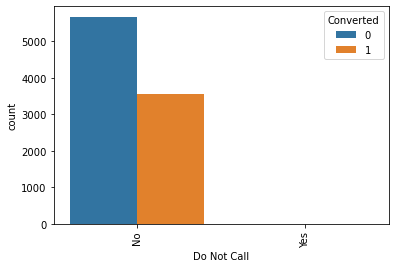

In [39]:
#ploting Do Not Call column to see how many got Converted
sns.countplot(x = "Do Not Call", hue = "Converted", data =gdata)
xticks(rotation = 90)

we can see that there is no value of Yes in this case so we can drop this column since it does not add any value to the data.

In [40]:
#Dropping Column
gdata=gdata.drop('Do Not Call',1)

## Conversion Ratio:

In [41]:
conversion = (sum(gdata['Converted'])/len(gdata['Converted'].index))*100
conversion

38.53896103896104

The dataset has a conversion rate of 38.54%

In [42]:
#saving the cleaned data is required.
#gdata.to_csv('Leads_cleaned')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

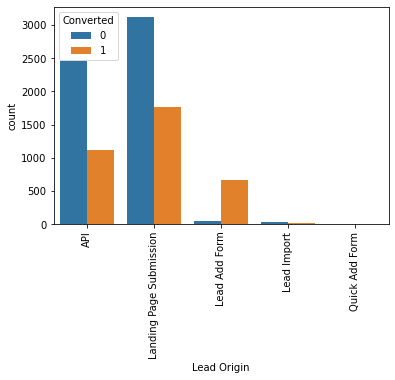

In [43]:
#ploting "Lead Origin" column to see how many got Converted
sns.countplot(x = "Lead Origin", hue = "Converted", data = gdata)
xticks(rotation = 90)

Note:
To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark chat'),
  Text(1, 0, 'Organic search'),
  Text(2, 0, 'Direct traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral sites'),
  Text(5, 0, 'Welingak website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

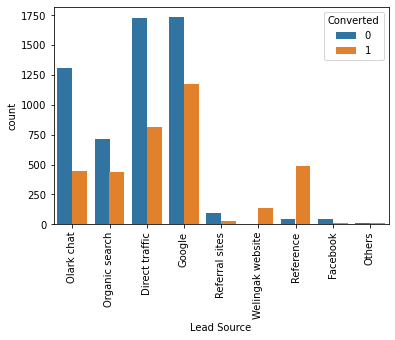

In [44]:
#ploting "Lead Source" column to see how many got Converted
sns.countplot(x = "Lead Source", hue = "Converted", data = gdata)
xticks(rotation = 90)

#### Note:To improve overall lead conversion rate, focus should be on improving lead converion of olark chat and google leads and generate more leads from reference and welingak website.

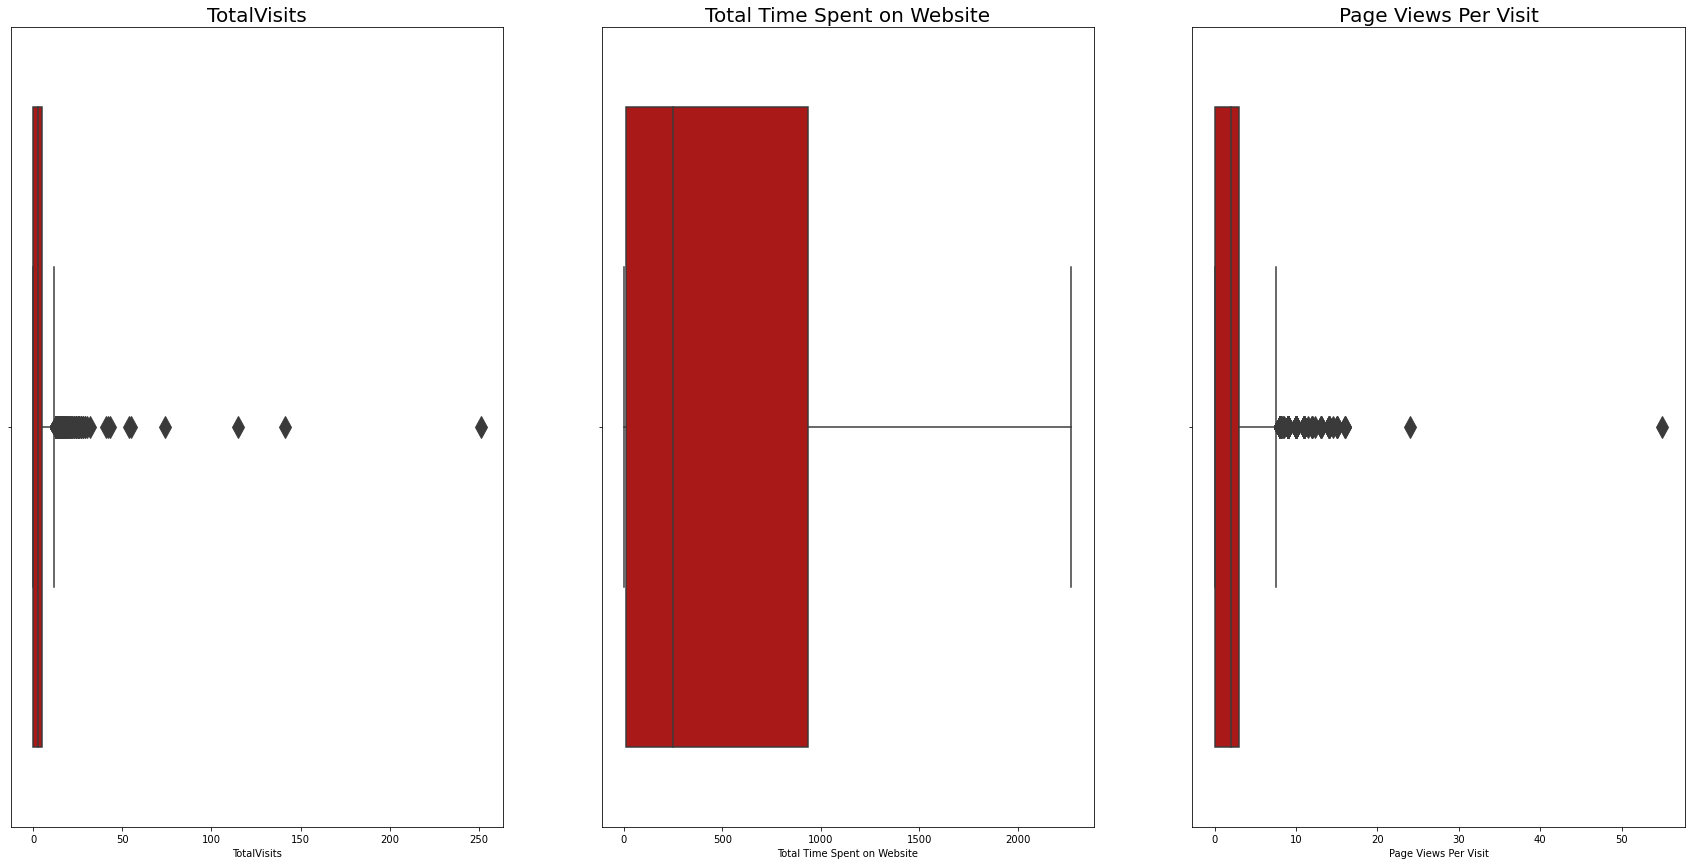

In [45]:

col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 
plt.figure(figsize=(30,50))
plt.tight_layout()
for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=gdata[col[i]],data=gdata,palette='gist_heat',orient='v',fliersize=15)  # using boxplot

We can see that there are some outliers present so we can treat these outliers before proceeding further

We will create bins for 'TotalVisits' and 'Page Veiws Per Visit'

Note:For 'TotalVisits' variable

As we have range from 0 to 251 for'TotalVisits' variable

1.'TotalVisits_0_50': 50

2.'TotalVisits_50_100': 100

3.'TotalVisits_100_150': 150

4.'TotalVisits_150_200' : 200

5.'TotalVisits_200_250': 250

6.'TotalVisits_250_300': 300





Note:For 'Page Views Per Visit' variable

As we have range from 0 to 55 for'Page Views Per Visit' variable

1.'Page Views Per Visit_0_10': 10

2.'Page Views Per Visit_10_20': 20

3.'Page Views Per Visit_20_30': 30

4.'Page Views Per Visit_30_40': 40

5.'Page Views Per Visit_40_50': 50

6.'Page Views Per Visit_50_60': 60

additionally Assigning '1' or '0' to each bins

In [46]:
# For 'TotalVisits' variable

# As we have range from 0 to 251 for'TotalVisits' variable

ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    gdata[list(ranges_total_visits.keys())[i]]=gdata['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] and x >= (list(ranges_total_visits.values())[i] - 50)) else 0)

# For 'Page Views Per Visit' variable

# As we have range from 0 to 55 for'Page Views Per Visit' variable

ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    gdata[list(ranges_total_visits_1.keys())[i]]=gdata['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] and x >= (list(ranges_total_visits_1.values())[i] - 10)) else 0)

In [47]:
#Removing Redudent variables:
redundant=['TotalVisits','Page Views Per Visit','TotalVisits_150_200','TotalVisits_200_250','Page Views Per Visit_30_40','Page Views Per Visit_40_50']

gdata=gdata.drop(redundant,axis=1)

gdata.head()

,Lead Origin,Lead Source,Do Not Email,Converted,Total Time Spent on Website,Last Activity,Specialization,What is your current occupation,Search,Magazine,...,Get updates on DM Content,Last Notable Activity,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60
0,API,Olark chat,No,0,0,Page Visited on Website,Others,Unemployed,No,No,...,No,Modified,1,0,0,0,1,0,0,0
1,API,Organic search,No,0,674,Email Opened,Others,Unemployed,No,No,...,No,Email Opened,1,0,0,0,1,0,0,0
2,Landing Page Submission,Direct traffic,No,1,1532,Email Opened,Business Administration,Student,No,No,...,No,Email Opened,1,0,0,0,1,0,0,0
3,Landing Page Submission,Direct traffic,No,0,305,Unreachable,Media and Advertising,Unemployed,No,No,...,No,Modified,1,0,0,0,1,0,0,0
4,Landing Page Submission,Google,No,1,1428,Converted to Lead,Others,Unemployed,No,No,...,No,Modified,1,0,0,0,1,0,0,0


In [48]:
#Looking at 'Last Activity'
gdata['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

We can club calues which have no or very less data

In [49]:
#Curbing less frequency counts into one-- Others
gdata['Last Activity'] = gdata['Last Activity'].replace(['View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'Others'),
  Text(11, 0, 'SMS Sent')])

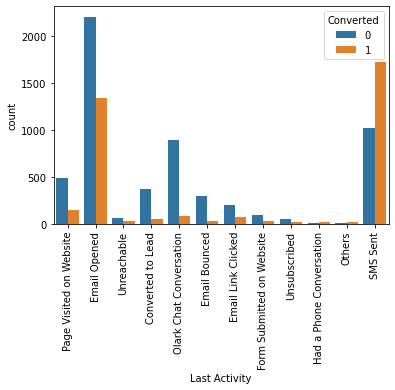

In [50]:
#Ploting Last Activity to see how many got converted
sns.countplot(x = "Last Activity", hue = "Converted", data = gdata)
xticks(rotation = 90)

Most of the lead have their Email opened as their last activity.

Conversion rate for leads with last activity as SMS Sent is High.

In [51]:
#'Specialization' Column
gdata['Specialization'].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

We can club values which have no or very less data

In [52]:
##Curbing less frequency counts into one-- Others
gdata['Specialization'] = gdata['Specialization'].replace(['Services Excellence','Retail Management',
                                                   'Hospitality Management','Rural and Agrbusiness','E-Business'], 'Others')

In [53]:
#'What is your current occupation' Column
gdata['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

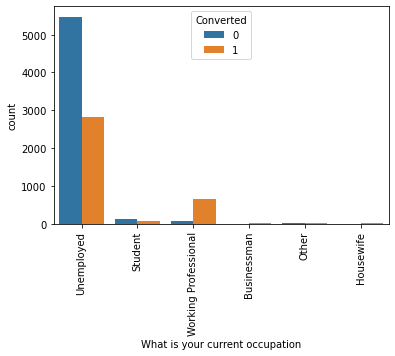

In [54]:
##Ploting "What is your current occupation" to see how many got converted
sns.countplot(x = "What is your current occupation", hue = "Converted", data = gdata)
xticks(rotation = 90)


Most of the people are unemployed and have a good conversion rate 

but in case of working professionsals convertion rate is significantly high

In [55]:
#Looking at other columns which could possibly be highly biased
col=('Search','Magazine','Newspaper Article', 'X Education Forums', 'Newspaper','Get updates on DM Content',
     'Digital Advertisement', 'Through Recommendations',"Receive More Updates About Our Courses",'Update me on Supply Chain Content')
for i in col:
    print(gdata[i].value_counts())

No     9226
Yes      14
Name: Search, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64


All of the above columns are biased. so we will drop them

In [56]:
#Droping highly biased Columns
for i in col:
    gdata=gdata.drop(i,axis=1)

In [57]:
#'Tags' Column
gdata['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [58]:
# We can club calues which have no or very less data

gdata['Tags'] = gdata['Tags'].replace(['Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','in touch with EINS','In confusion whether part time or DLP', 'Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized','opp hangup','number not provided'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Others'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Diploma holder (Not Eligible)'),
  Text(9, 0, 'Graduation in progress'),
  Text(10, 0, 'Closed by Horizzon'),
  Text(11, 0, 'Not doing further education'),
  Text(12, 0, 'invalid number'),
  Text(13, 0, 'wrong number given'),
  Text(14, 0, 'Interested  in full time MBA')])

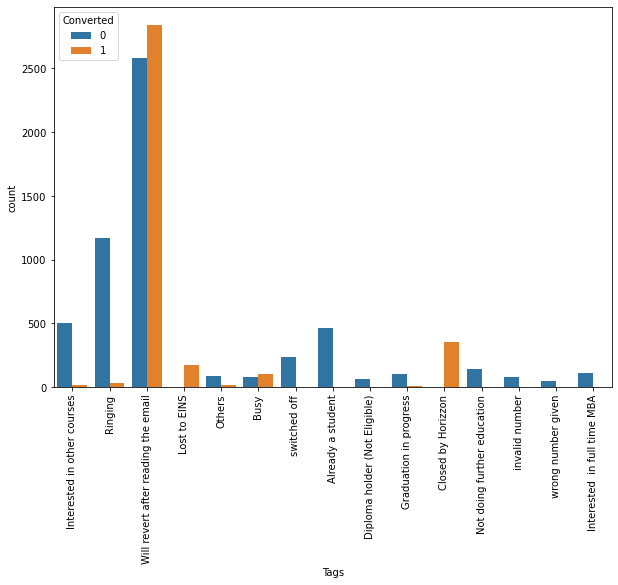

In [59]:
#Ploting "Tags" to see how many got converted
plt.figure(figsize=(10,7))
sns.countplot(x = "Tags", hue = "Converted", data = gdata)
xticks(rotation = 90)

'Will revert after reading the mail' has high conversion rate



## Data Transformation

Assigning numerical variables to categories with 'Yes' to 1 and 'No' to 0

In [60]:
# Yes : 1 , No : 0

gdata['Do Not Email'] = gdata['Do Not Email'].map({'Yes': 1, "No": 0})

## Creation of dummy variables

In [61]:

dcol=['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity','Tags','Specialization']
# creating dummy columns

dummy=pd.get_dummies(gdata[dcol],drop_first=True)

# Adding these dummies to our original dataset

gdata=pd.concat([gdata,dummy],axis=1)

gdata.shape

(9240, 89)

In [62]:
# We have created dummies for below categories hence removing the original column
gdata.drop(dcol, axis = 1, inplace = True)
gdata.shape

(9240, 82)

## Test-Train Split
### The next step is to split the dataset into training an testing sets.

In [63]:
# Separating target varaible from dependent variable

y=gdata['Converted']     # putting target varaible 'Converted' to a new series 'y'

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [64]:
# Putting dependent variable in a new dataset called 'X'

X=gdata.drop('Converted',1)

X.head()

,Do Not Email,Total Time Spent on Website,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,674,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1532,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,305,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1428,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [65]:
# Splitting the datset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [66]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

# Now, Scalling the 'Total Time Spent on Website' variables with standard scaler and fitting - tranforming the X - train dataset

X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Total Time Spent on Website,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,0.000000,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6795,0,0.214349,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3516,0,0.046655,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,0,0.541373,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3934,0,0.000000,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.53896103896104

We have conversion rate of almost 38.54%

### Looking at the correlations


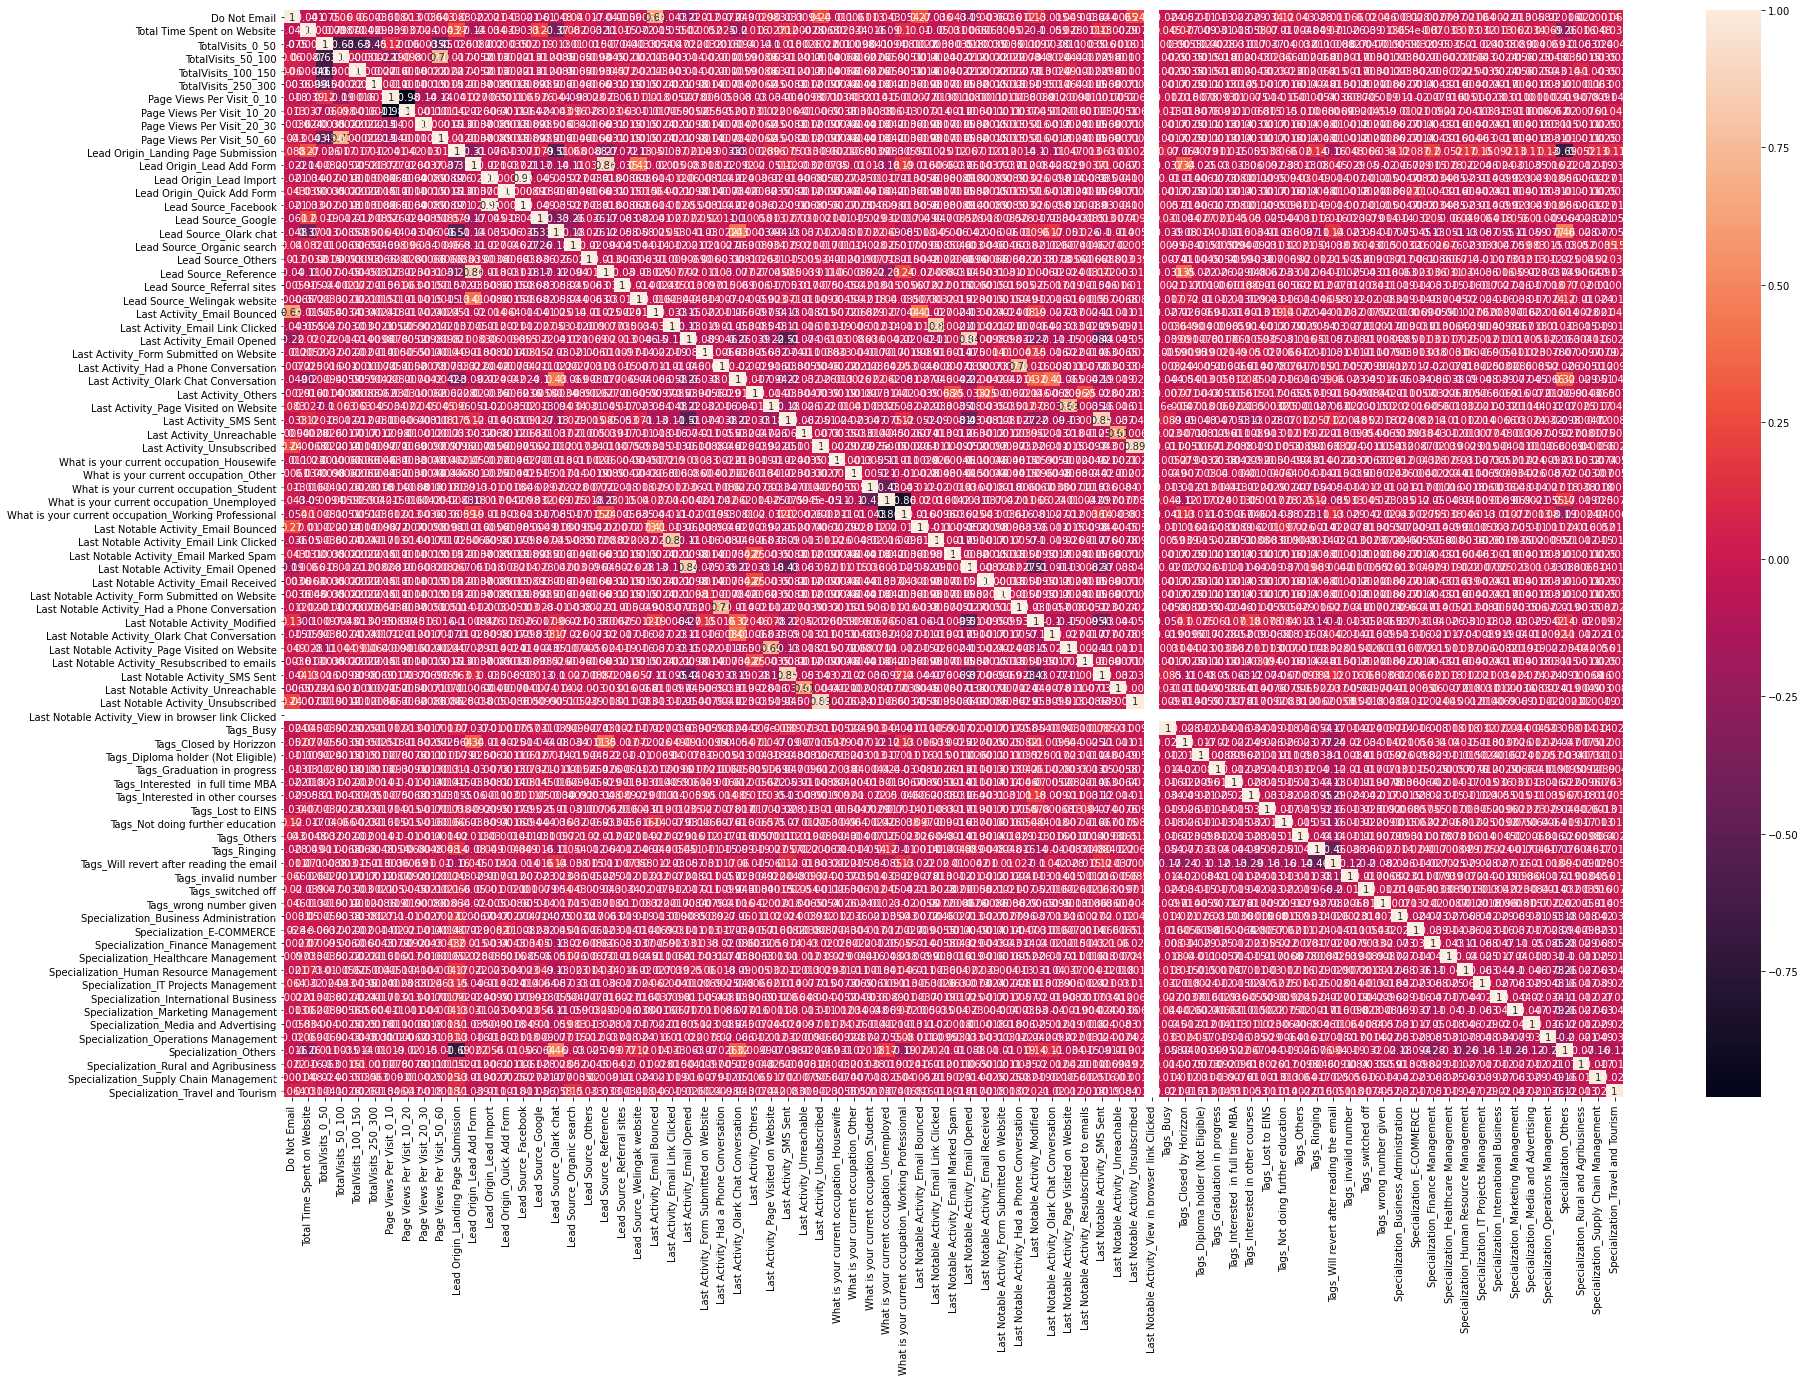

In [68]:
# Let's see the correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [69]:
X_train.corr()

,Do Not Email,Total Time Spent on Website,TotalVisits_0_50,TotalVisits_50_100,TotalVisits_100_150,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_50_60,...,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Do Not Email,1.000000,-0.041355,-0.074676,0.060305,0.060305,-0.003627,-0.018157,0.013022,-0.003627,0.042639,...,-0.020896,0.064110,0.002188,-0.012544,-0.005777,-0.019822,-0.016376,0.022457,-0.000145,0.064419
Total Time Spent on Website,-0.041355,1.000000,-0.000790,0.008660,-0.000414,-0.009895,-0.038794,0.036802,0.023734,-0.004252,...,0.073239,0.032237,0.012567,0.061923,0.034222,0.069444,-0.256954,0.015614,0.048436,0.030885
TotalVisits_0_50,-0.074676,-0.000790,1.000000,-0.632309,-0.632309,-0.447075,0.120885,-0.060415,0.000346,-0.447075,...,-0.010440,-0.023899,0.003840,0.008927,0.004030,0.006851,0.011474,-0.063117,-0.023759,0.004107
TotalVisits_50_100,0.060305,0.008660,-0.632309,1.000000,-0.000309,-0.000219,-0.193490,0.097855,-0.000219,0.707052,...,-0.005588,0.042969,-0.002428,-0.005644,-0.002548,-0.004332,0.003505,-0.001505,-0.003475,-0.002597
TotalVisits_100_150,0.060305,-0.000414,-0.632309,-0.000309,1.000000,-0.000219,0.001599,-0.001568,-0.000219,-0.000219,...,0.024885,-0.003460,-0.002428,-0.005644,-0.002548,-0.004332,-0.014428,0.102030,-0.003475,-0.002597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Operations Management,-0.019822,0.069444,0.006851,-0.004332,-0.004332,-0.003063,0.000235,0.000621,-0.003063,-0.003063,...,-0.078258,-0.048459,-0.034011,-0.079055,-0.035691,1.000000,-0.202083,-0.021074,-0.048668,-0.036370
Specialization_Others,-0.016376,-0.256954,0.011474,0.003505,-0.014428,-0.010202,0.018611,-0.019666,0.015157,-0.010202,...,-0.260643,-0.161396,-0.113274,-0.263296,-0.118871,-0.202083,1.000000,-0.070189,-0.162090,-0.121132
Specialization_Rural and Agribusiness,0.022457,0.015614,-0.063117,-0.001505,0.102030,-0.001064,0.007777,-0.007627,-0.001064,-0.001064,...,-0.027181,-0.016831,-0.011813,-0.027458,-0.012397,-0.021074,-0.070189,1.000000,-0.016904,-0.012632
Specialization_Supply Chain Management,-0.000145,0.048436,-0.023759,-0.003475,-0.003475,0.062938,-0.009099,0.009965,-0.002457,-0.002457,...,-0.062771,-0.038869,-0.027280,-0.063410,-0.028628,-0.048668,-0.162090,-0.016904,1.000000,-0.029172


## Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [70]:
# running RFE with 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [71]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('TotalVisits_0_50', False, 26),
 ('TotalVisits_50_100', False, 50),
 ('TotalVisits_100_150', False, 32),
 ('TotalVisits_250_300', False, 11),
 ('Page Views Per Visit_0_10', False, 28),
 ('Page Views Per Visit_10_20', False, 49),
 ('Page Views Per Visit_20_30', False, 35),
 ('Page Views Per Visit_50_60', False, 60),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 44),
 ('Lead Origin_Quick Add Form', False, 41),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 46),
 ('Lead Source_Olark chat', False, 25),
 ('Lead Source_Organic search', False, 45),
 ('Lead Source_Others', False, 61),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral sites', False, 47),
 ('Lead Source_Welingak website', True, 1),
 ('Last Activity_Email Bounced', False, 19),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity

In [72]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [73]:
#Looking at unSelected columns
X_train.columns[~rfe.support_]

Index(['TotalVisits_0_50', 'TotalVisits_50_100', 'TotalVisits_100_150',
       'TotalVisits_250_300', 'Page Views Per Visit_0_10',
       'Page Views Per Visit_10_20', 'Page Views Per Visit_20_30',
       'Page Views Per Visit_50_60', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark chat',
       'Lead Source_Organic search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'What is your current occupation_Housewi

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [74]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [75]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_1 = sm.add_constant(X_train)    # Adding constant
logm1 = sm.GLM(y_train, X_train_1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1815.0
Date:                Mon, 14 Jun 2021   Deviance:                       3630.0
Time:                        22:42:55   Pearson chi2:                 1.10e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.3110      0.376    -11.468      0.000      -5.048      -3.574
Do Not Email                                            -1.4220      0.184     -7.725      0.000      -1.783      -1.061
Total Time Spent on Website                              4.3011      0.184     23.423      0.000       3.941       4.661
Lead Origin_Lead Add Form                                3.0280      0.241     12.577      0.000       2.556       3.500
Lead Source_Welingak website                             1.6225      0.769      2.110      0.035       0.115       3.130
What is your current occupation_Unemployed              -1.3287      0.320     -4.152      0.000      -1.956      -0.702
What is your current occupation_Working Professional     1.5008      0.399      3.765      0.000       0.719       2.282
Last Notable Activity_Had a Phone Conversation           3.4143      1.147      2.975      0.003       1.165       5.663
Last Notable Activity_SMS Sent                           2.6210      0.116     22.643      0.000       2.394       2.848
Tags_Busy                                                3.2674      0.334      9.774      0.000       2.612       3.923
Tags_Closed by Horizzon                                  9.0237      1.042      8.659      0.000       6.981      11.066
Tags_Lost to EINS                                        8.4598      0.764     11.079      0.000       6.963       9.956
Tags_Others                                              2.1266      0.434      4.900      0.000       1.276       2.977
Tags_Ringing                                            -0.9124      0.337     -2.706      0.007      -1.573      -0.252
Tags_Will revert after reading the email                 3.9220      0.248     15.826      0.000       3.436       4.408
Tags_switched off                                       -0.8614      0.581     -1.484      0.138      -1.999       0.277
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will drop high P value variable.

In [76]:
# Dropping the most insignificant values ('Tags_switched off') and constant

X_train_2=X_train_1.drop(['const','Tags_switched off'],1)


In [77]:
# Creating a new model

X_train_2=sm.add_constant(X_train_2)                              # Adding constant
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
reg2.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.10387
Method:                          IRLS   Log-Likelihood:                -1846.5
Date:                Mon, 14 Jun 2021   Deviance:                       670.30
Time:                        22:42:55   Pearson chi2:                     670.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0485      0.026      1.840      0.066      -0.003       0.100
Do Not Email                                            -0.1375      0.015     -9.151      0.000      -0.167      -0.108
Total Time Spent on Website                              0.5472      0.018     31.211      0.000       0.513       0.582
Lead Origin_Lead Add Form                                0.3199      0.018     17.577      0.000       0.284       0.356
Lead Source_Welingak website                             0.1761      0.038      4.668      0.000       0.102       0.250
What is your current occupation_Unemployed              -0.1393      0.026     -5.323      0.000      -0.191      -0.088
What is your current occupation_Working Professional     0.1153      0.030      3.855      0.000       0.057       0.174
Last Notable Activity_Had a Phone Conversation           0.4453      0.097      4.571      0.000       0.254       0.636
Last Notable Activity_SMS Sent                           0.3143      0.010     31.399      0.000       0.295       0.334
Tags_Busy                                                0.2964      0.031      9.691      0.000       0.236       0.356
Tags_Closed by Horizzon                                  0.6673      0.025     26.971      0.000       0.619       0.716
Tags_Lost to EINS                                        0.8303      0.032     25.863      0.000       0.767       0.893
Tags_Others                                              0.1171      0.037      3.198      0.001       0.045       0.189
Tags_Ringing                                            -0.0842      0.015     -5.764      0.000      -0.113      -0.056
Tags_Will revert after reading the email                 0.3485      0.011     32.125      0.000       0.327       0.370
========================================================================================================================
"""

In [78]:
# Checking VIF again just to be sure

X_train_2_1=X_train_2.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_2_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_2_1.values,i) for i in range(X_train_2_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
4,What is your current occupation_Unemployed,5.07
13,Tags_Will revert after reading the email,4.15
1,Total Time Spent on Website,1.95
12,Tags_Ringing,1.72
2,Lead Origin_Lead Add Form,1.63
5,What is your current occupation_Working Profes...,1.62
7,Last Notable Activity_SMS Sent,1.48
9,Tags_Closed by Horizzon,1.45
3,Lead Source_Welingak website,1.24
8,Tags_Busy,1.12


VIF is high for 'What is your current occupation_Unemployed' so we will drop it

In [79]:
# Dropping the most insignificant values ('What is your current occupation_Unemployed') and constant

X_train_3=X_train_2.drop(['const','What is your current occupation_Unemployed'],1)



In [80]:
# Creating a new model

X_train_3=sm.add_constant(X_train_3)                              # Adding constant
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())  # Using GLM, creating model
reg3=logis3.fit()                                                 # Fitting our model
reg3.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.10431
Method:                          IRLS   Log-Likelihood:                -1860.7
Date:                Mon, 14 Jun 2021   Deviance:                       673.24
Time:                        22:42:55   Pearson chi2:                     673.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0822      0.010     -8.544      0.000      -0.101      -0.063
Do Not Email                                            -0.1375      0.015     -9.138      0.000      -0.167      -0.108
Total Time Spent on Website                              0.5492      0.018     31.268      0.000       0.515       0.584
Lead Origin_Lead Add Form                                0.3253      0.018     17.864      0.000       0.290       0.361
Lead Source_Welingak website                             0.1686      0.038      4.465      0.000       0.095       0.243
What is your current occupation_Working Professional     0.2503      0.016     15.789      0.000       0.219       0.281
Last Notable Activity_Had a Phone Conversation           0.4430      0.098      4.538      0.000       0.252       0.634
Last Notable Activity_SMS Sent                           0.3131      0.010     31.219      0.000       0.293       0.333
Tags_Busy                                                0.2890      0.031      9.439      0.000       0.229       0.349
Tags_Closed by Horizzon                                  0.6612      0.025     26.698      0.000       0.613       0.710
Tags_Lost to EINS                                        0.8235      0.032     25.619      0.000       0.761       0.887
Tags_Others                                              0.1100      0.037      3.001      0.003       0.038       0.182
Tags_Ringing                                            -0.0926      0.015     -6.364      0.000      -0.121      -0.064
Tags_Will revert after reading the email                 0.3425      0.011     31.675      0.000       0.321       0.364
========================================================================================================================
"""

In [81]:
# Checking VIF again just to be sure

X_train_3_1=X_train_3.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_3_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_3_1.values,i) for i in range(X_train_3_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
12,Tags_Will revert after reading the email,1.86
1,Total Time Spent on Website,1.83
2,Lead Origin_Lead Add Form,1.63
6,Last Notable Activity_SMS Sent,1.48
8,Tags_Closed by Horizzon,1.31
3,Lead Source_Welingak website,1.24
4,What is your current occupation_Working Profes...,1.21
11,Tags_Ringing,1.15
0,Do Not Email,1.06
7,Tags_Busy,1.05


VIF is high for 'Tags_Will revert after reading the email' so we will drop it

In [82]:
# Dropping the most insignificant values ('Tags_Will revert after reading the email') and constant

X_train_4=X_train_3.drop(['const','Tags_Will revert after reading the email'],1)




In [83]:
# Creating a new model

X_train_4=sm.add_constant(X_train_4)                              # Adding constant
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())  # Using GLM, creating model
reg4=logis4.fit()                                                 # Fitting our model
reg4.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.12051
Method:                          IRLS   Log-Likelihood:                -2328.0
Date:                Mon, 14 Jun 2021   Deviance:                       777.90
Time:                        22:42:55   Pearson chi2:                     778.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1461      0.007     21.323      0.000       0.133       0.160
Do Not Email                                            -0.1585      0.016     -9.806      0.000      -0.190      -0.127
Total Time Spent on Website                              0.6106      0.019     32.545      0.000       0.574       0.647
Lead Origin_Lead Add Form                                0.3808      0.019     19.549      0.000       0.343       0.419
Lead Source_Welingak website                             0.1972      0.041      4.858      0.000       0.118       0.277
What is your current occupation_Working Professional     0.2889      0.017     17.004      0.000       0.256       0.322
Last Notable Activity_Had a Phone Conversation           0.5216      0.105      4.971      0.000       0.316       0.727
Last Notable Activity_SMS Sent                           0.3526      0.011     32.964      0.000       0.332       0.374
Tags_Busy                                                0.0235      0.032      0.741      0.459      -0.039       0.085
Tags_Closed by Horizzon                                  0.3727      0.025     15.055      0.000       0.324       0.421
Tags_Lost to EINS                                        0.5654      0.033     16.916      0.000       0.500       0.631
Tags_Others                                             -0.1411      0.038     -3.666      0.000      -0.216      -0.066
Tags_Ringing                                            -0.3454      0.013    -26.431      0.000      -0.371      -0.320
========================================================================================================================
"""

'Tags_Busy' have high P_value so we will drop it

In [84]:
# Dropping the most insignificant values ('Tags_Busy') and constant

X_train_5=X_train_4.drop(['const','Tags_Busy'],1)

In [85]:
# Creating a new model

X_train_5=sm.add_constant(X_train_5)                              # Adding constant
logis5=sm.GLM(y_train,X_train_5,families=sm.families.Binomial())  # Using GLM, creating model
reg5=logis5.fit()                                                 # Fitting our model
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.12050
Method:                          IRLS   Log-Likelihood:                -2328.3
Date:                Mon, 14 Jun 2021   Deviance:                       777.97
Time:                        22:42:55   Pearson chi2:                     778.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1465      0.007     21.456      0.000       0.133       0.160
Do Not Email                                            -0.1588      0.016     -9.828      0.000      -0.190      -0.127
Total Time Spent on Website                              0.6111      0.019     32.585      0.000       0.574       0.648
Lead Origin_Lead Add Form                                0.3805      0.019     19.537      0.000       0.342       0.419
Lead Source_Welingak website                             0.1968      0.041      4.850      0.000       0.117       0.276
What is your current occupation_Working Professional     0.2882      0.017     16.990      0.000       0.255       0.321
Last Notable Activity_Had a Phone Conversation           0.5212      0.105      4.968      0.000       0.316       0.727
Last Notable Activity_SMS Sent                           0.3533      0.011     33.172      0.000       0.332       0.374
Tags_Closed by Horizzon                                  0.3725      0.025     15.049      0.000       0.324       0.421
Tags_Lost to EINS                                        0.5649      0.033     16.906      0.000       0.499       0.630
Tags_Others                                             -0.1416      0.038     -3.682      0.000      -0.217      -0.066
Tags_Ringing                                            -0.3461      0.013    -26.556      0.000      -0.372      -0.321
========================================================================================================================
"""

In [86]:
# Checking VIF again just to be sure

X_train_5_1=X_train_5.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_5_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_5_1.values,i) for i in range(X_train_5_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
1,Total Time Spent on Website,1.38
6,Last Notable Activity_SMS Sent,1.37
7,Tags_Closed by Horizzon,1.25
3,Lead Source_Welingak website,1.24
4,What is your current occupation_Working Profes...,1.19
10,Tags_Ringing,1.09
0,Do Not Email,1.04
8,Tags_Lost to EINS,1.03
9,Tags_Others,1.01


'Lead Origin_Lead Add Form' has high Vif value, so we will drop it

In [87]:
# Dropping the most insignificant values ('Lead Origin_Lead Add Form') and constant

X_train_6=X_train_5.drop(['const','Lead Origin_Lead Add Form'],1)

In [88]:
# Creating a new model

X_train_6=sm.add_constant(X_train_6)                              # Adding constant
logis6=sm.GLM(y_train,X_train_6,families=sm.families.Binomial())  # Using GLM, creating model
reg6=logis6.fit()                                                 # Fitting our model
reg6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                         0.12761
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Mon, 14 Jun 2021   Deviance:                       823.96
Time:                        22:42:55   Pearson chi2:                     824.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1705      0.007     24.651      0.000       0.157       0.184
Do Not Email                                            -0.1580      0.017     -9.503      0.000      -0.191      -0.125
Total Time Spent on Website                              0.5384      0.019     28.464      0.000       0.501       0.575
Lead Source_Welingak website                             0.5187      0.038     13.594      0.000       0.444       0.593
What is your current occupation_Working Professional     0.3513      0.017     20.498      0.000       0.318       0.385
Last Notable Activity_Had a Phone Conversation           0.5098      0.108      4.722      0.000       0.298       0.721
Last Notable Activity_SMS Sent                           0.3821      0.011     35.205      0.000       0.361       0.403
Tags_Closed by Horizzon                                  0.5430      0.024     22.782      0.000       0.496       0.590
Tags_Lost to EINS                                        0.5923      0.034     17.240      0.000       0.525       0.660
Tags_Others                                             -0.1409      0.040     -3.560      0.000      -0.219      -0.063
Tags_Ringing                                            -0.3576      0.013    -26.689      0.000      -0.384      -0.331
========================================================================================================================
"""

In [89]:
# Checking VIF again just to be sure

X_train_6_1=X_train_6.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_6_1.columns       # Adding final train dataset features

# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_6_1.values,i) for i in range(X_train_6_1.shape[1])]

# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

vif   # viewing the dataset

,Features,VIF
1,Total Time Spent on Website,1.36
5,Last Notable Activity_SMS Sent,1.32
3,What is your current occupation_Working Profes...,1.14
9,Tags_Ringing,1.09
6,Tags_Closed by Horizzon,1.08
0,Do Not Email,1.03
2,Lead Source_Welingak website,1.03
7,Tags_Lost to EINS,1.03
8,Tags_Others,1.01
4,Last Notable Activity_Had a Phone Conversation,1.00


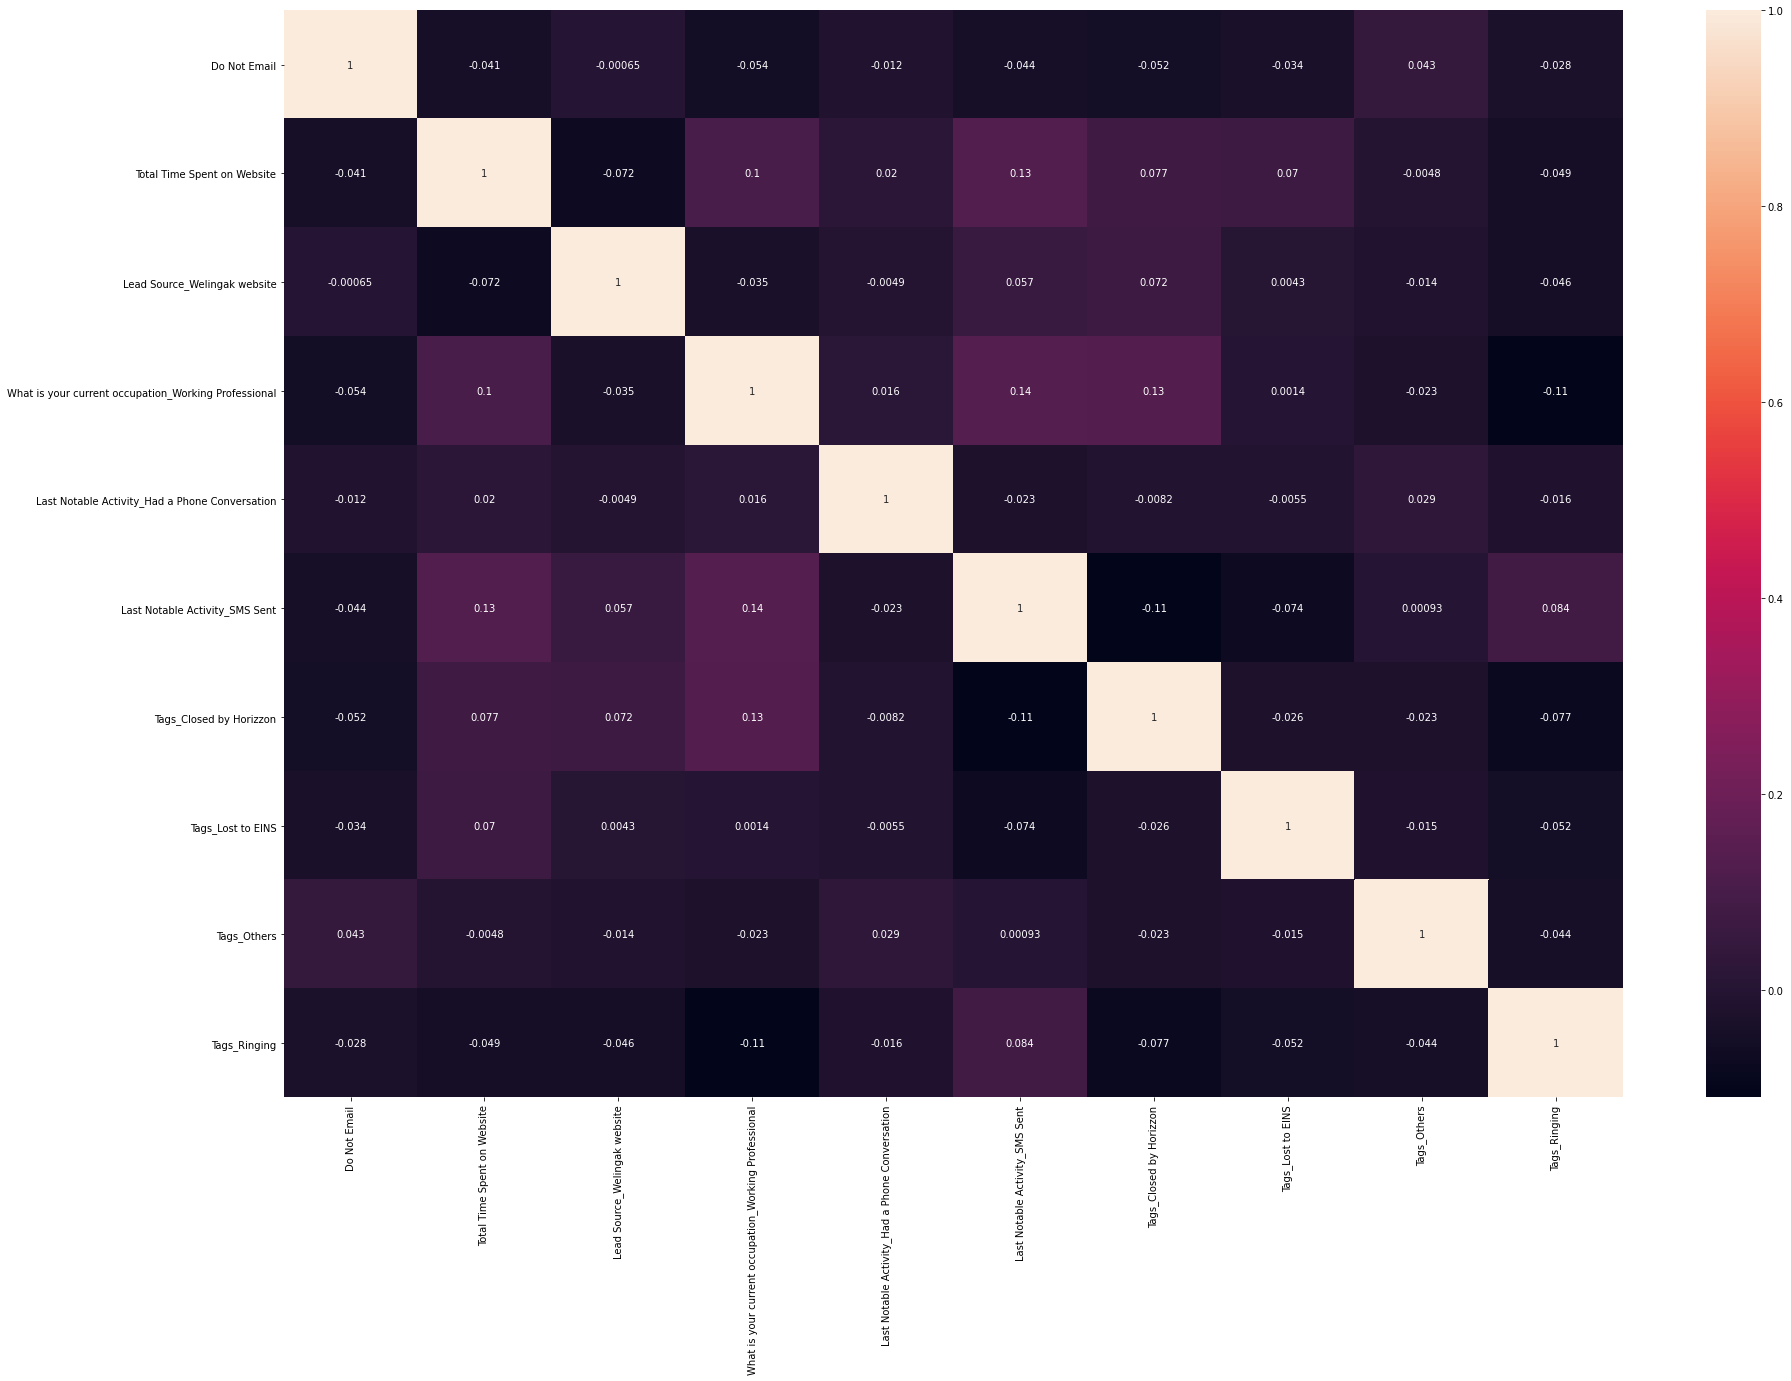

In [90]:
# Let's see the final correlation matrix 
plt.figure(figsize = (30,20))        # Size of the figure
sns.heatmap(X_train_6_1.corr(),annot = True)
plt.show()

In [91]:
res=reg6

No sign of multicollinearity shown from above vif dataframe and Heatmap hence reg6(res) is our final model and we are going to use it predict the X train dataset.

## Predicting a Train model

In [92]:
# Predicting the train dataset with our final model

y_train_pred=res.predict(X_train_6)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()   # viewing first 5 rows

,Converted,Converted_probability,ID
1871,0,-0.187144,1871
6795,0,0.285853,6795
3516,0,-0.162026,3516
8105,0,0.486454,8105
3934,0,0.170452,3934


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_probability,ID,predicted
1871,0,-0.187144,1871,0
6795,0,0.285853,6795,0
3516,0,-0.162026,3516,0
8105,0,0.486454,8105,0
3934,0,0.170452,3934,0


In [94]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3657  345]
 [ 725 1741]]


In [95]:
### Predicted     not_churn    churn
### Actual
### not_churn       3270      365
### churn           579       708  

In [96]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8345701917130488

In [97]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
# Calculate the sensitivity

TP/(TP+FN)

0.7060016220600163

In [99]:
# Calculate the specificity

TN/(TN+FP)

0.9137931034482759

In [100]:
# False postive rate
print(FP/ float(TN+FP))

0.08620689655172414


In [101]:
# Positive Predictive Value 
print (TP / float(TP+FP))

0.8346116970278044


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8345504335919671


### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [103]:
# Importing necessary libraries for roc curve

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

# Creating a function to plot roc curve with auc score

def draw_roc( real, probability ):
    
    # Creating roc curve values like false positive rate , true positive rate and threshold
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    
    # Calculating the auc score(area under the curve)
    
    auc_score = roc_auc_score( real, probability )    
    
    # Setting the figure size
    
    plt.figure(figsize=(8, 4))
    
    # Plotting the roc curve
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    
    # Plotting the 45% dotted line 
    plt.plot([0, 1], [0, 1], 'r--')
    
    # Setting the x axis linit
    
    plt.xlim([0.0, 1.0])
    
    # Setting the y axis limit
    
    plt.ylim([0.0, 1.05])
    
    # Setting the x axis label
    
    plt.xlabel('False Positive Rate')
    
    # Setting the y axis label
    
    plt.ylabel('True Positive Rate')
    
    # Setting the title
    
    plt.title('Receiver operating characteristic')
    
    # Setting the legend on the left below to show the value of auc    
    
    plt.legend(loc="lower right")
    
    # Showing the plot
    
    plt.show()

    return None   # no return

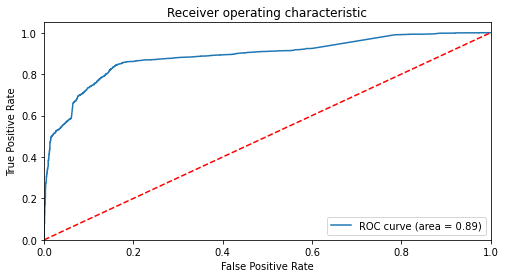

In [104]:
# Calling the roc curve for plotting

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

The area under the curve of the ROC is 0.89 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [105]:
# creating 10 points out of which one we will choose for our cutoff point

numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9 with set size 0.1

for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   #  Mapping the probablities for each 10 points
y_train_pred_final.head()   # Viewing the first 5 rows

,Converted,Converted_probability,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,-0.187144,1871,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.285853,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,-0.162026,3516,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.486454,8105,0,1,1,1,1,1,0,0,0,0,0
3934,0,0.170452,3934,0,1,1,0,0,0,0,0,0,0,0


In [106]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.453463  0.996756  0.118691
0.1   0.1  0.498299  0.991484  0.194403
0.2   0.2  0.676098  0.905921  0.534483
0.3   0.3  0.831478  0.859286  0.814343
0.4   0.4  0.838126  0.804542  0.858821
0.5   0.5  0.834570  0.706002  0.913793
0.6   0.6  0.802412  0.539335  0.964518
0.7   0.7  0.791589  0.475669  0.986257
0.8   0.8  0.747835  0.353204  0.991004
0.9   0.9  0.711967  0.248986  0.997251


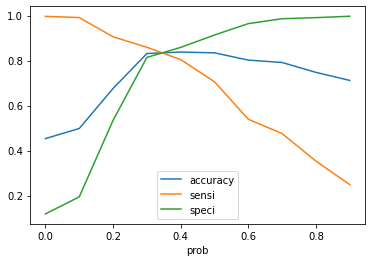

In [107]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.35, you get the optimal values of the three metrics. So let's choose 0.35 as our cutoff now.

In [108]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_probability.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,-0.187144,1871,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.285853,6795,0,1,1,1,0,0,0,0,0,0,0
3516,0,-0.162026,3516,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.486454,8105,1,1,1,1,1,1,0,0,0,0,0
3934,0,0.170452,3934,0,1,1,0,0,0,0,0,0,0,0


In [109]:
#Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8410636982065554

In [110]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion2

array([[3362,  640],
       [ 388, 2078]])

In [111]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [112]:
# Calculate Sensitivity

TP/(TP+FN)

0.8426601784266018

In [113]:
# Calculate Specificity

TN/(TN+FP)

0.84007996001999

This cutoff point seems to give better results

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [114]:
# Scale the test set as well using just 'transform'

X_test[['Total Time Spent on Website']] = scaler.transform(X_test[['Total Time Spent on Website']])

In [115]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4269,0,0.444982,0,0,1,0,0,1,0,0,0,0,0,1,0
2376,0,0.000000,1,0,1,0,0,1,0,0,0,0,0,1,0
7766,0,0.025968,0,0,0,1,0,0,0,0,0,0,0,1,0
9199,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
4359,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,1,0


In [116]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [117]:
# Check X_test_sm

X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak website,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
4269,1.0,0,0.444982,0,0,1,0,0,1,0,0,0,0,0,1,0
2376,1.0,0,0.000000,1,0,1,0,0,1,0,0,0,0,0,1,0
7766,1.0,0,0.025968,0,0,0,1,0,0,0,0,0,0,0,1,0
9199,1.0,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
4359,1.0,0,0.000000,1,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0.127641,0,0,1,0,0,0,0,0,0,0,0,1,0
2152,1.0,0,0.000000,1,0,1,0,0,1,0,0,0,0,0,1,0
7101,1.0,0,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,0
5331,1.0,1,0.707746,0,0,1,0,0,0,0,0,0,0,0,1,0


In [118]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Origin_Lead Add Form','Tags_switched off','What is your current occupation_Unemployed',
             'Tags_Will revert after reading the email','Tags_Busy','Lead Origin_Lead Add Form'], 1, inplace = True)



In [119]:
X_test.columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Welingak website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Others', 'Tags_Ringing'],
      dtype='object')

In [120]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = reg6.predict(sm.add_constant(X_test))

In [121]:
y_test_pred[:10]

4269    0.792155
2376    0.552586
7766    0.535703
9199    0.170452
4359    0.170452
9186    0.697607
1631    0.410495
8963    0.233958
8007    0.251967
5324    0.590500
dtype: float64

In [122]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [123]:
# Let's see the head

y_pred_1.head()

,0
4269,0.792155
2376,0.552586
7766,0.535703
9199,0.170452
4359,0.170452


In [124]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [125]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [126]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.792155
1,1,0.552586
2,1,0.535703
3,0,0.170452
4,1,0.170452


In [128]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [129]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.792155
1,1,0.552586
2,1,0.535703
3,0,0.170452
4,1,0.170452


In [130]:
# Make predictions on the test set using 0.35 as the cutoff

y_pred_final['predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [131]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,predicted
0,1,0.792155,1
1,1,0.552586,1
2,1,0.535703,1
3,0,0.170452,0
4,1,0.170452,0


In [132]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.predicted)

0.8466810966810967

In [133]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.predicted )
confusion2

array([[1409,  268],
       [ 157,  938]])

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Sensitivity
TP / float(TP+FN)

0.85662100456621

In [136]:
# Calculate specificity
TN / float(TN+FP)

0.840190816935003

In [137]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.15980918306499703

In [138]:
# Positive predictive value 
TP / float(TP+FP)

0.7777777777777778

In [139]:
# Negative predictive value
TN / float(TN+ FN)

0.8997445721583652

### Precision and recall tradeoff

In [140]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     0
 79      1
 8039    0
 6936    0
 5640    0
 Name: predicted, Length: 6468, dtype: int64)

In [141]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

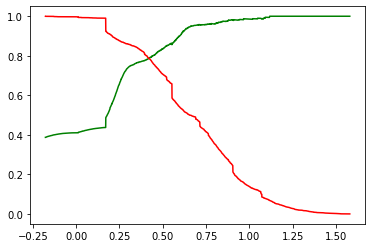

In [142]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_probability.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_probability,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1871,0,-0.187144,1871,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.285853,6795,0,1,1,1,0,0,0,0,0,0,0,0
3516,0,-0.162026,3516,0,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.486454,8105,1,1,1,1,1,1,0,0,0,0,0,1
3934,0,0.170452,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [144]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8410636982065554

In [145]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3362,  640],
       [ 388, 2078]])

In [146]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [147]:
# Calculate Precision

TP/(TP+FP)

0.7645327446651949

In [148]:
# Calculate Recall

TP/(TP+FN)

0.8426601784266018

## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [149]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [150]:
y_test_pred[:10]

4269    0.792155
2376    0.552586
7766    0.535703
9199    0.170452
4359    0.170452
9186    0.697607
1631    0.410495
8963    0.233958
8007    0.251967
5324    0.590500
dtype: float64

In [151]:
y_test_pred[:10]

4269    0.792155
2376    0.552586
7766    0.535703
9199    0.170452
4359    0.170452
9186    0.697607
1631    0.410495
8963    0.233958
8007    0.251967
5324    0.590500
dtype: float64

In [152]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [153]:
# Let's see the head

y_pred_1.head()

,0
4269,0.792155
2376,0.552586
7766,0.535703
9199,0.170452
4359,0.170452


In [154]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [155]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [156]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [157]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.792155
1,1,0.552586
2,1,0.535703
3,0,0.170452
4,1,0.170452


In [158]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Converted_probablity'})

In [159]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Converted_probablity
0,1,0.792155
1,1,0.552586
2,1,0.535703
3,0,0.170452
4,1,0.170452


In [160]:
# Make predictions on the test set using 0.35 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Converted_probablity.map(lambda x: 1 if x > 0.35 else 0)

In [161]:
# Check y_pred_final

y_pred_final.head()

,Converted,Converted_probablity,final_predicted
0,1,0.792155,1
1,1,0.552586,1
2,1,0.535703,1
3,0,0.170452,0
4,1,0.170452,0


In [162]:
#Conversion Ratio
conversion1 = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
conversion1

43.506493506493506

In [163]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8466810966810967

In [164]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1409,  268],
       [ 157,  938]])

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Sensitivity
TP / float(TP+FN)

0.85662100456621

In [167]:
# Specificity
TN / float(TN+FP)

0.840190816935003

### The Accuracy, Precision and Recall score we got from test set in aceptable range
### Sensitivity of the prediction over test data set is 86%

## Relooking at features that contribute most to the model

In [168]:
# Selecting the coefficients of the selected features from our final model excluding the intercept

pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -0.16
Total Time Spent on Website                             0.54
Lead Source_Welingak website                            0.52
What is your current occupation_Working Professional    0.35
Last Notable Activity_Had a Phone Conversation          0.51
Last Notable Activity_SMS Sent                          0.38
Tags_Closed by Horizzon                                 0.54
Tags_Lost to EINS                                       0.59
Tags_Others                                            -0.14
Tags_Ringing                                           -0.36
dtype: float64

In [169]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -26.67
Total Time Spent on Website                             90.89
Lead Source_Welingak website                            87.57
What is your current occupation_Working Professional    59.30
Last Notable Activity_Had a Phone Conversation          86.06
Last Notable Activity_SMS Sent                          64.52
Tags_Closed by Horizzon                                 91.68
Tags_Lost to EINS                                      100.00
Tags_Others                                            -23.80
Tags_Ringing                                           -60.37
dtype: float64

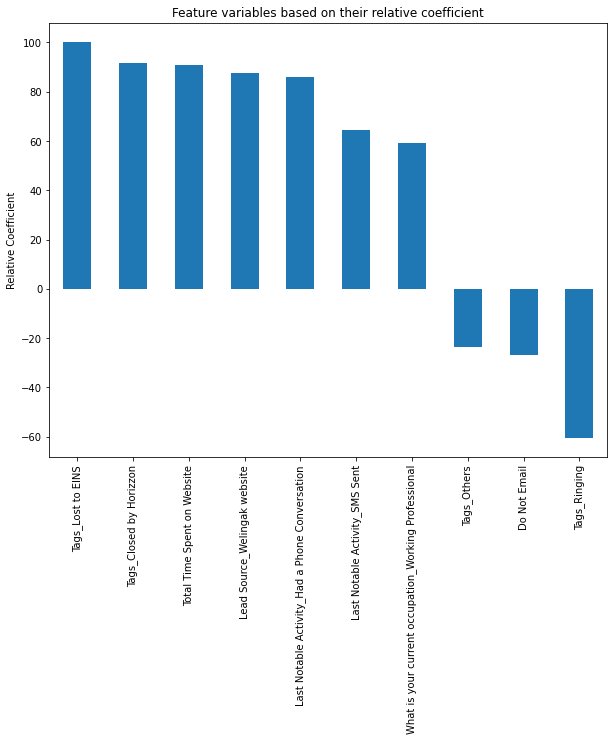

In [170]:
# Plot showing the feature variables based on their relative coefficient values
plt.figure(figsize = (10,8))
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature variables based on their relative coefficient')
plt.ylabel('Relative Coefficient')
plt.show()

In [171]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted
absvalue=abs(feature_importance)
pd.DataFrame(absvalue).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Lost to EINS,100.00
6,Tags_Closed by Horizzon,91.68
1,Total Time Spent on Website,90.89


## Result

1.Top 3 variables that contributing to convert a lead are:
    
    Tags_Lost to EINS
    Tags_Closed by Horizzon
    Total Time Spent on Website
    
    
2.Top 3 variables that need improvement to convert a lead are:

    Lead Source_Welingak website
    Last Notable Activity_Had a Phone Conversation
    Tags_Ringing

### Analysed by: 
    
    Swathi Somayaji
    Dolanandha Venkata Sai Abhinav Gongada